In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
%cd /content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Dados

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Dados


## Carregando as Bases de dados

In [43]:
!pip install catboost -q

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot
from catboost import CatBoostClassifier, Pool

## Preparação da base

In [45]:
# ABRINDO A BASE

pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', 42)

#df = pd.read_csv('bases/df_modelo.csv', sep=',')
df = pd.read_csv('df_familia_pessoas_final.csv',nrows=100000)
df = df.sample(10000)
print(f'Shape:', df.shape)

Shape: (10000, 72)


In [46]:
df = df[['qtd_pessoas', 'meses_trabalho','idade','idoso', 'cod_principal_trab_memb', 'classe_renda']]

<ipython-input-47-2953c318eaef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classe_renda', data=df, palette="coolwarm")


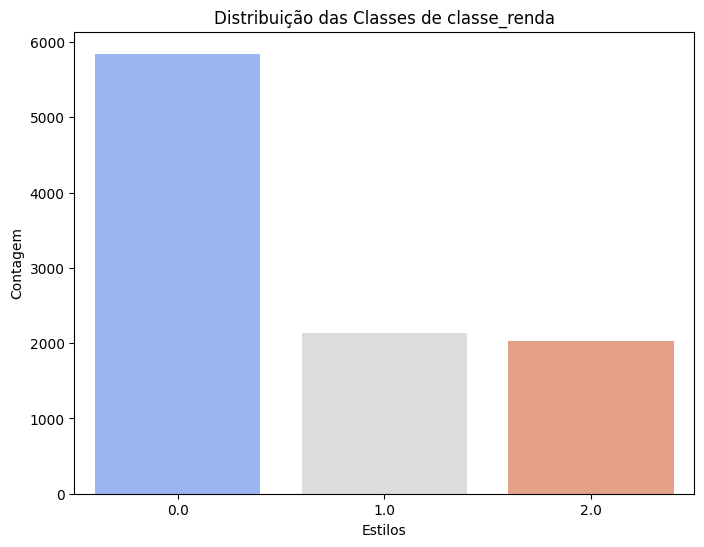

In [47]:
# visualizando distribuição da classe

# Contar a quantidade de cada categoria na variável 'Style'
plt.figure(figsize=(8, 6))
sns.countplot(x='classe_renda', data=df, palette="coolwarm")

# Adicionar título e rótulos
plt.title('Distribuição das Classes de classe_renda')
plt.xlabel('Estilos')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()

0.7135


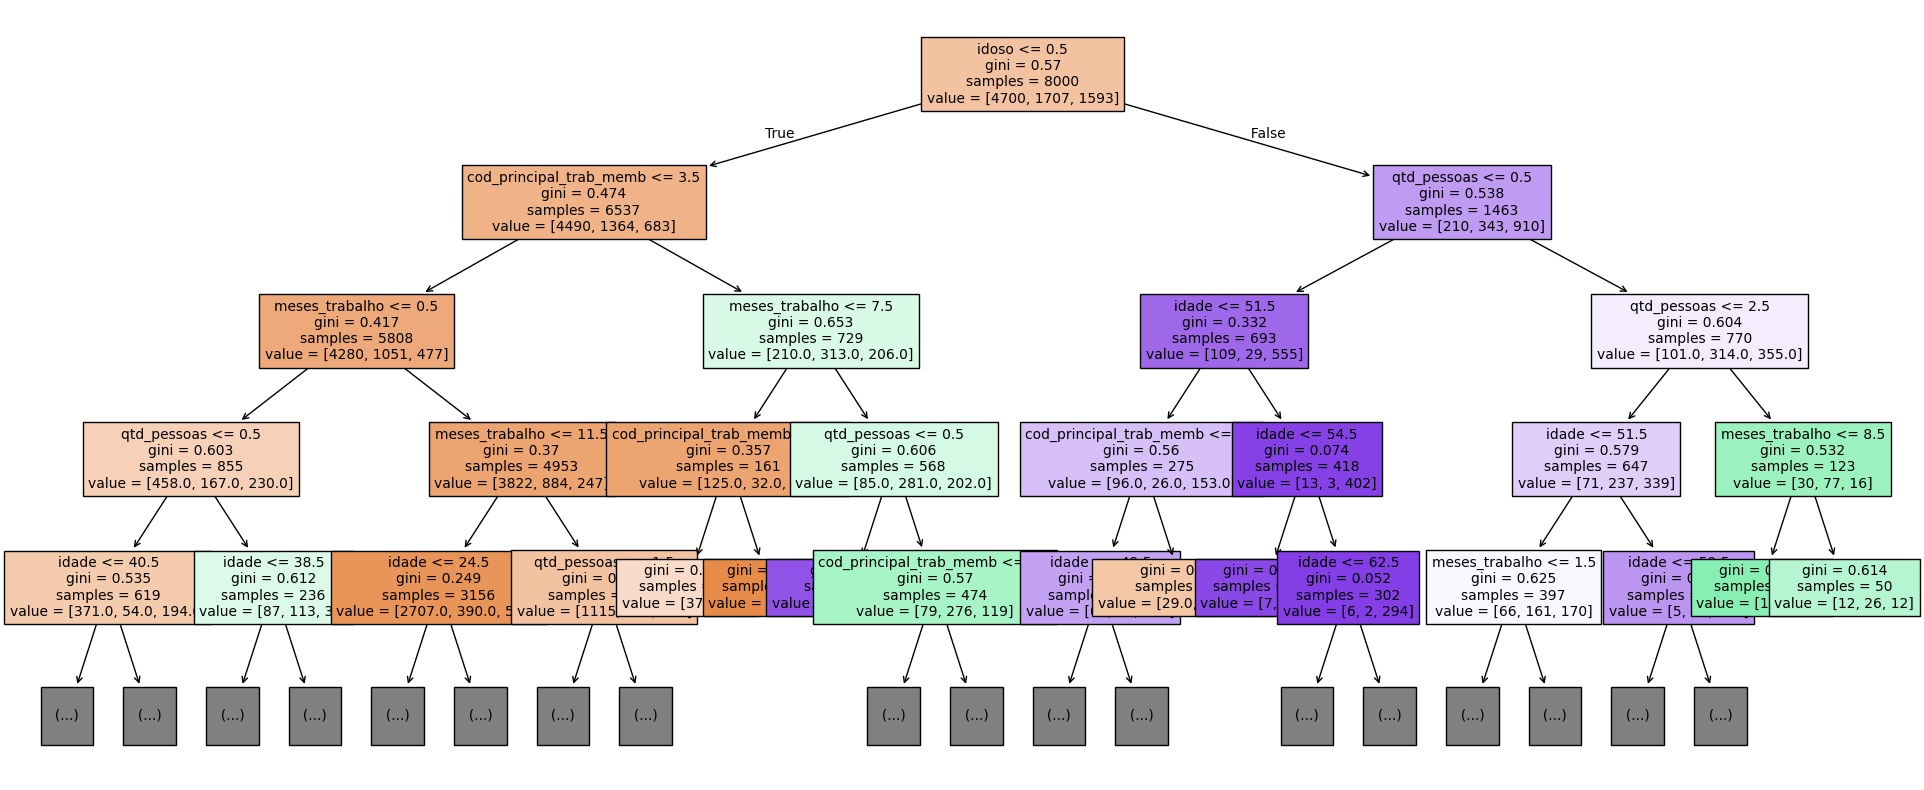

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# define dataset
X = df.drop(columns=['classe_renda'])
y = df['classe_renda']
# Partição treino/teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Testando outros modelos: Árvore de decisão Classificador
# Como temos dados categóricos, precisamos codificá-los numericamente:
enc = OrdinalEncoder().fit(X_train)


tree = DecisionTreeClassifier(min_samples_split=100, min_samples_leaf=50).fit(enc.transform(X_train), y_train)
print(tree.score(enc.transform(X_test), y_test))
metrics.f1_score(y_test, tree.predict(enc.transform(X_test)), average='weighted')

plt.figure(figsize=(24,10))
plot_tree(tree, filled=True, fontsize=10, feature_names=X_train.columns, max_depth=4)
plt.show()


In [49]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


In [50]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

In [52]:
# Suppress warnings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import dtreeviz
# Assuming your target variable 'classe_renda' has values other than 0 and 1
# Get unique values from your target variable (y_train)
class_values = y_train.unique()
# Update class_names to match the unique values in y_train
class_names = [str(val) for val in class_values] # Convert values to strings

viz = dtreeviz.model(tree, enc.transform(X_train), y_train,
               target_name="classe",
               feature_names= list(X.columns),
               class_names=class_names) # Use the updated class_names

viz.view(scale=0.8)

TypeError: list indices must be integers or slices, not numpy.float64